In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/website-traffic/datasets/traffic.csv


### This data project has been used as a take-home assignment in the recruitment process for the data science positions at Linkfire.
**The goal of this project is to understand this traffic better, in particular the volume and distribution of events, and to develop ideas how to increase the links' clickrates.** 
With that in mind, please analyze the data using the Python libraries Pandas and SciPy where indicated, providing answers to the presented questions:

- How many total pageview events did the links in the provided dataset receive in the full period, how many per day?
- What about the other recorded events?
- Which countries did the pageviews come from?
- What was the overall click rate (clicks/pageviews)?
- How does the clickrate distribute across different links?
- Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

In [2]:
df= pd.read_csv("/kaggle/input/website-traffic/datasets/traffic.csv")

In [3]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [4]:
df.shape

(226278, 9)

In [5]:
df.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

In [7]:
df['event'].unique()

array(['click', 'preview', 'pageview'], dtype=object)

## Question 1.
How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

In [8]:
df.dtypes

event      object
date       object
country    object
city       object
artist     object
album      object
track      object
isrc       object
linkid     object
dtype: object

In [10]:
df['date']=pd.to_datetime(df['date'])

To print each unique value of the event column, alongside a count of its occurrences, we can use the value_counts() method. The output for the pageview events is 142,015, so that is our total number of such events. Another solution for it would be to filter the data set to contain only the pageview events and then to read the number of rows in the filtered data set (second cell below).



Please note that we allow for duplicates in the data, i.e., if the same user views the same page multiple times, it will be counted each time. We can use df.drop_duplicates() to modify this behaviour and see the difference. The following cells illustrate the difference in the data caused after deduplicating: the number of events lowers by nearly half.

In [77]:
df=df.drop_duplicates()

In [78]:
y = df['event'].value_counts()
y

event
pageview    73360
click       32499
preview     16708
Name: count, dtype: int64

In [79]:
# the total pageview events is the number of rows where 'event' = 'pageview'
df[df["event"] == "pageview"].shape[0]

73360

Getting the number of pageview events per day requires the application of the groupby method, followed by an aggregate (count) function.

We group the pageview events by the date and then count their occurrence.

In [81]:
# 1. filter only for 'pageview' events
# 2. group by the date
# 3. keep only the 'event' column, and specify a 'count' aggregation
Event_sort_date = df[df['event']=='pageview'].groupby('date')['event'].count().sort_values(ascending=False)
Event_sort_date
# answer 1 below 

date
2021-08-19    13006
2021-08-20    11088
2021-08-22     9982
2021-08-21     9939
2021-08-25     9918
2021-08-23     9722
2021-08-24     9705
Name: event, dtype: int64

## Question 2.
What about the other recorded events?


In the first line in the cell below we obtain the set of all unique events in the data. Then, we remove the pageview event because it was already analysed in the previous question. We will deal with whatever events remain.



In [94]:
# get the set of recorded events in the data
recorded_events = set(df["event"].unique())
# remove the 'pageview' event
recorded_events.remove("pageview")
recorded_events

{'click', 'preview'}

Once we have the other recorded events, we can simply loop over them and apply the same solution from Question 1, adding some informative print statements in the process.



In [95]:
# loop over each event
for recorded_event in recorded_events:
    # get the total number of occurrences
    total_events = df[df["event"] == recorded_event].shape[0]
    print("Total number of", recorded_event, "events is", total_events, "\n")
    # group by the date and aggregate by count
    data_set = df[df["event"] == recorded_event].groupby(by="date")["event"].count()
    print(recorded_event, "event distribution per day:\n")
    print(data_set, "\n")

Total number of preview events is 16708 

preview event distribution per day:

date
2021-08-19    2290
2021-08-20    2449
2021-08-21    2483
2021-08-22    2524
2021-08-23    2379
2021-08-24    2355
2021-08-25    2228
Name: event, dtype: int64 

Total number of click events is 32499 

click event distribution per day:

date
2021-08-19    5860
2021-08-20    4999
2021-08-21    4279
2021-08-22    4421
2021-08-23    4314
2021-08-24    4231
2021-08-25    4395
Name: event, dtype: int64 



## Question 3.
Which countries did the pageviews come from?

This question is a bit simpler than the ones before, in the sense that it does not require any groupings or aggregations. The solution consists of two steps:

1. We need to filter for the click events only
2. We can print the unique values of the Country column (ignoring any nans)

In [97]:
Countries= pd.DataFrame(data = df[df['event']=='pageview'].groupby('country')['event'].count().sort_values(ascending= False))
Countries.head(10)

,event
country,
United States,18131
India,10565
France,6181
Saudi Arabia,3712
United Kingdom,3218
Germany,2585
Canada,1702
Turkey,1598
Pakistan,1382


## Question 4. 
**What was the overall click rate (clicks/pageviews)?**

The click rate is the number of clicks that a page has received (event = 'click') divided by the number of times it has been shown (event = 'pageview'). It is a commonly used metric that measures the success of an advertising campaign.

Its calculation requires a few steps.

To start with, we can count the number of times each link has been clicked on, and the number of times each link has been viewed. The same procedure applies to both calculations. We first filter for the proper event (click or pageview), then we group the filtered data by the link Id and count the occurrences of that event.

In [98]:
# filter only 'click' events and group them by the 'linkid' to get their count,
# i.e., number of clicks on each link
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks" # rename column for easier manipulation
})
# do the same for the 'pageview' events
pageviews = df[df["event"] == "pageview"].groupby(by="linkid")["event"].count().reset_index()
pageviews = pageviews.rename(columns={
    "event": "pageviews"
})

In [99]:
link_clicks.head()

,linkid,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,6
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3


In [100]:
pageviews.head()

,linkid,pageviews
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1


To get the answer, we need to somehow join these two Dataframes on the same link Id, and then divide the number of clicks by the number of pageviews to get the required click rate. It can be achieved with Pandas' merge() method. We specify a 'left' and a 'right' Dataframe, a column to merge on, and how the merge should go (we specify 'inner' which takes the intersection of the two data sets).

In [101]:
# pd.merge() does a database-style join of the two dataframes
df_q4 = pd.merge(left=link_clicks, right=pageviews, on="linkid", how="inner")

In [102]:
# define a new column of the 'click_rate'
df_q4["click_rate"] = df_q4["clicks"] / df_q4["pageviews"]

In [103]:
df_q4

,linkid,clicks,pageviews,click_rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,6,26,0.230769
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,3,1.000000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,25,67,0.373134
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


## Question 5.
**How does the clickrate distribute across different links?**

To get a sense of the distribution of the click rate across different links, we can use the describe() method. The cell below does that. Observe the output. We have the count (number of links), the mean, standard deviation, min, max, as well as the value of the click rate at the 25, 50, and 75th percentile.



In [105]:
df_q4['click_rate'].describe()

count    2253.000000
mean        0.796403
std         0.940052
min         0.100000
25%         0.500000
50%         1.000000
75%         1.000000
max        43.333333
Name: click_rate, dtype: float64

Tabular data can only give us so much, so we can try to plot the data and visualize some insights.

Using the plot() method we plot a histogram with 100 bins. Notice how we provide parameters for the figure size and the label of the X-axis. It is always a good idea to have these as they provide make the interpretation of the graphic a lot easier.

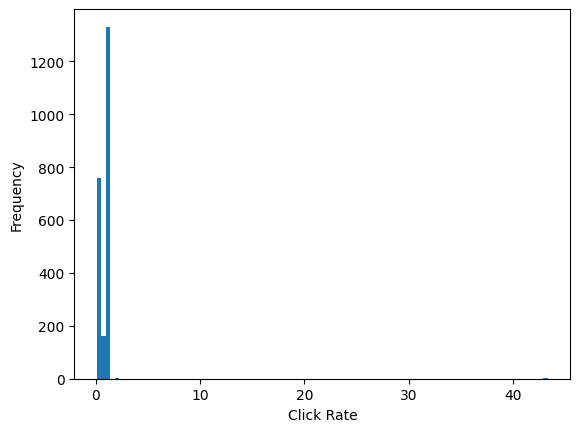

In [108]:
ax = df_q4['click_rate'].plot(kind='hist',bins=100)
we = ax.set_xlabel('Click Rate')

The histogram shows that the data is highly skewed to left, i.e., many of its values are very close to zero. In such cases, a common workaround is to plot the histogram of the logarithm of the data. Let us try that, we can use Numpy's log2() method for it!



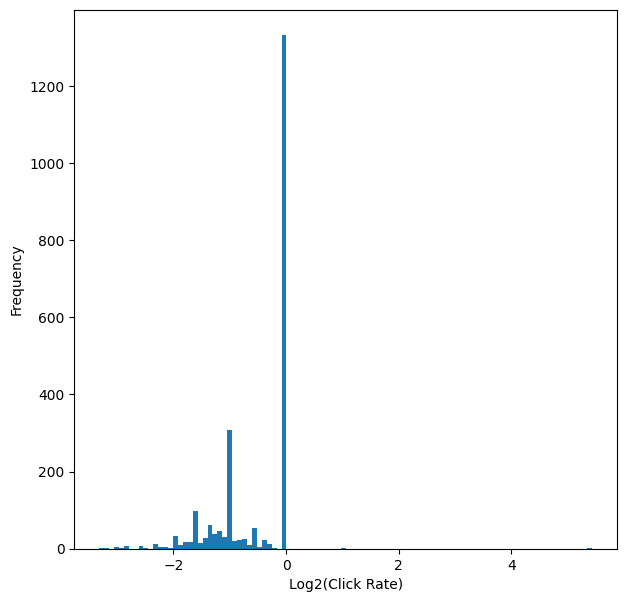

In [109]:
# because the data is highly skewed, it makes more sense to plot the log of it
df_q4["click_rate_log2"] = np.log2(df_q4["click_rate"])
ax = df_q4["click_rate_log2"].plot(kind="hist", figsize=(7, 7), bins=100)
_ = ax.set_xlabel("Log2(Click Rate)")

We observe an enormous spike at the 0 meaning that the actual click rate was 1, implying that there are many links that have been viewed and clicked on exactly once. There are also, many links that have been viewed many times but clicked on fewer (values less than zero). Remember, this plots the logarithm of the actual values, so there is an extra math step in the interpretation here.

One last thing to try is a box plot, which is basically a visualization of the describe() method.




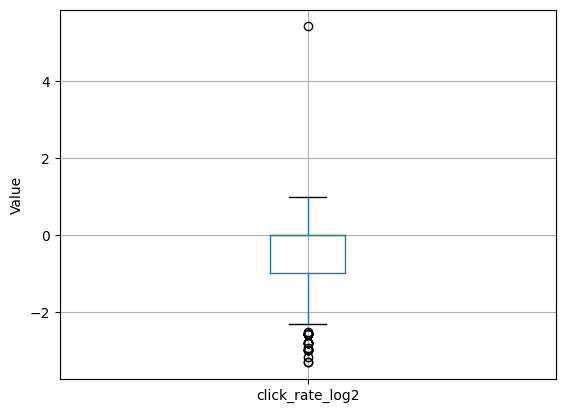

In [110]:
ax = df_q4.boxplot(column="click_rate_log2")
_ = ax.set_ylabel("Value")

We observe two (and one particular) high outliers, and many, many below the Q1 (i.e., click rate very close to zero). Our guess is that there are at least two links, that have been clicked on multiple times in the same page view.


## Question 6. 
 **Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.**
 
 Pearson's correlation coefficient is a measure of linear correlation between two data sets. It takes its value in the range of [-1, 1] and the further it is from zero, the more significant the correlation is.

Pearson's coefficient is implemented in both Pandas and Scipy, and here we are actually going to use both libraries, just to explore their APIs and to compare results! (should be the same).

First, let us filter the data to contain only the click and the preview events. We can describe it to get a sense of the contents.

In [113]:
# filter only events that are relevant to the question
df_q6 = df[df["event"].isin(["click", "preview"])]

In [118]:
df_q6.describe(include='all')

,event,date,country,city,artist,album,track,isrc,linkid
count,49207,49207,49205,49205,49198,49206,49206,47246,49207
unique,2,NaN,206,8137,1549,2003,2155,628,2286
top,click,NaN,United States,Unknown,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,32499,NaN,10533,3749,3712,3712,3712,3712,3712
mean,NaN,2021-08-21 20:53:28.226472192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2021-08-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2021-08-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2021-08-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2021-08-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2021-08-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we just repeat the same procedure as in Question 4. We create two new columns and append them to the original data.



In [119]:
# filter only 'click' events and group them by the 'linkid' to get their count,
# i.e., number of clicks on each link
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={
    "event": "clicks" # rename column for easier manipulation
})
# do the same for the 'preview' events
previews = df[df["event"] == "preview"].groupby(by="linkid")["event"].count().reset_index()
previews = previews.rename(columns={
    "event": "previews"
})

In [120]:
# perform two database-style joins to append the 
# number of link clicks and previews to each row
df_q6 = pd.merge(left=df_q6, right=link_clicks, how="left", on="linkid")
df_q6 = pd.merge(left=df_q6, right=previews, how="left", on="linkid")

In [121]:
df_q6.dropna(subset=["clicks", "previews"], inplace=True)
df_q6

,event,date,country,city,artist,album,track,isrc,linkid,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,2266.0,1446.0
1,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,684.0,432.0
2,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,46.0,26.0
3,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,2266.0,1446.0
4,click,2021-08-21,United States,Los Angeles,KenTheMan,I'm Perfect,I'm Perfect,US39N2102090,190c7170-4044-4c97-9709-926917155b02,523.0,331.0
...,...,...,...,...,...,...,...,...,...,...,...
49202,preview,2021-08-23,Myanmar,Yangon,Justin Bieber,Justice,Peaches,USUM72102636,6add5818-33b1-4ab1-977d-435af50e9b10,116.0,80.0
49203,preview,2021-08-23,United States,Brentwood,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,2266.0,1446.0
49204,preview,2021-08-23,Ukraine,Kyiv,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c,125.0,82.0
49205,preview,2021-08-23,Saudi Arabia,Khamis Mushait,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c,891.0,753.0


In [136]:
cols= ['clicks','previews']
x = df_q6[cols]
y = df_q6['clicks']
x.corr()

,clicks,previews
clicks,1.000000,0.984054
previews,0.984054,1.000000


In [138]:
from scipy import stats
stats.pearsonr(x=df_q6["clicks"], y=df_q6["previews"])

PearsonRResult(statistic=0.9840541182271481, pvalue=0.0)

Almost perfectly positive correlation between the number of clicks and previews which seems logical; given that the one is actually dependent on the other (can't have clicks without previews and vice versa).

Using pd.factorize() we can quantify the relationship between categorical variables in similar manner as with numerical variables.

In [139]:
categorical_columns = [
    "country",
    "city",
    "artist",
    "album",
    "track"
]
factorized_df = df_q6[categorical_columns] \
                     .apply(lambda x: pd.factorize(x)[0]) \
                     .corr()
factorized_df

,country,city,artist,album,track
country,1.000000,0.110448,-0.057606,-0.054248,-0.054016
city,0.110448,1.000000,0.000978,0.003972,0.006747
artist,-0.057606,0.000978,1.000000,0.934663,0.939540
album,-0.054248,0.003972,0.934663,1.000000,0.973713
track,-0.054016,0.006747,0.939540,0.973713,1.000000


We observe a high positive correlation between album, artist, and track and almost no correlation between other variables. This is again expected, since those variables are naturally dependent, i.e., each track belongs to an album and is performed by an artist.